# 01. Import Libraries

In [3]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm 
import os
import warnings 

warnings.filterwarnings("ignore") 

plt.style.use('fivethirtyeight')

# 02. Import Data

### I couldnt find any dataset on the Quandl website that works with my NBA data

In [4]:
# path shortcut
path = r'C:\Users\georg\Documents\2025-04-07 - NBA Game Analysis\Data'

In [5]:
# import wrangled dataset
df_games = pd.read_csv(os.path.join(path, 'games_wrangeled.csv'), index_col = False)

In [8]:
df_games.head()

,Unnamed: 0,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,FG3_PCT_home,...,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS,HOME_TEAM_NAME,HOME_CITY,AWAY_TEAM_NAME,AWAY_CITY,HOME_STATE_FULL,AWAY_STATE_FULL
0,0,2022-12-22,22200477,Final,2022,1610612740,126.0,0.484,0.926,0.382,...,0.321,23.0,44.0,1,Pelicans,New Orleans,Spurs,San Antonio,Louisiana,Texas
1,1,2022-12-22,22200478,Final,2022,1610612762,120.0,0.488,0.952,0.457,...,0.333,20.0,37.0,1,Jazz,Utah,Wizards,Washington,Utah,District of Columbia
2,2,2022-12-21,22200466,Final,2022,1610612739,114.0,0.482,0.786,0.313,...,0.433,20.0,46.0,1,Cavaliers,Cleveland,Bucks,Milwaukee,Ohio,Wisconsin
3,3,2022-12-21,22200467,Final,2022,1610612755,113.0,0.441,0.909,0.297,...,0.261,15.0,46.0,1,76ers,Philadelphia,Pistons,Detroit,Pennsylvania,Michigan
4,4,2022-12-21,22200468,Final,2022,1610612737,108.0,0.429,1.000,0.378,...,0.292,20.0,47.0,0,Hawks,Atlanta,Bulls,Chicago,Georgia,Illinois


# 03. Creating Subset

### Since multiple games are played each day, I will create a subset of the data that contains the average stats for HOME GAMES only - i will try to see if stats have changed over time.

In [10]:
df_games.columns

Index(['Unnamed: 0', 'GAME_DATE_EST', 'GAME_ID', 'GAME_STATUS_TEXT', 'SEASON',
       'TEAM_ID_home', 'PTS_home', 'FG_PCT_home', 'FT_PCT_home',
       'FG3_PCT_home', 'AST_home', 'REB_home', 'TEAM_ID_away', 'PTS_away',
       'FG_PCT_away', 'FT_PCT_away', 'FG3_PCT_away', 'AST_away', 'REB_away',
       'HOME_TEAM_WINS', 'HOME_TEAM_NAME', 'HOME_CITY', 'AWAY_TEAM_NAME',
       'AWAY_CITY', 'HOME_STATE_FULL', 'AWAY_STATE_FULL'],
      dtype='object')

In [11]:
# change date col to date time format
df_games['GAME_DATE_EST'] = pd.to_datetime(df_games['GAME_DATE_EST'])

# Drop Away Cols
df_games_sub = df_games.drop(columns = ['Unnamed: 0', 'GAME_ID', 'GAME_STATUS_TEXT', 'SEASON', 'TEAM_ID_home', 'TEAM_ID_away', 'PTS_away', 'FG_PCT_away', 'FT_PCT_away', 'FG3_PCT_away', 'AST_away', 'REB_away'])


In [12]:
df_games_sub.head()

,GAME_DATE_EST,PTS_home,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,REB_home,HOME_TEAM_WINS,HOME_TEAM_NAME,HOME_CITY,AWAY_TEAM_NAME,AWAY_CITY,HOME_STATE_FULL,AWAY_STATE_FULL
0,2022-12-22,126.0,0.484,0.926,0.382,25.0,46.0,1,Pelicans,New Orleans,Spurs,San Antonio,Louisiana,Texas
1,2022-12-22,120.0,0.488,0.952,0.457,16.0,40.0,1,Jazz,Utah,Wizards,Washington,Utah,District of Columbia
2,2022-12-21,114.0,0.482,0.786,0.313,22.0,37.0,1,Cavaliers,Cleveland,Bucks,Milwaukee,Ohio,Wisconsin
3,2022-12-21,113.0,0.441,0.909,0.297,27.0,49.0,1,76ers,Philadelphia,Pistons,Detroit,Pennsylvania,Michigan
4,2022-12-21,108.0,0.429,1.000,0.378,22.0,47.0,0,Hawks,Atlanta,Bulls,Chicago,Georgia,Illinois


In [13]:
# deleting some additional cols
df_games_sub = df_games_sub.drop(columns = ['HOME_TEAM_WINS', 'HOME_TEAM_NAME', 'HOME_CITY', 'AWAY_TEAM_NAME', 'AWAY_CITY', 'HOME_STATE_FULL', 'AWAY_STATE_FULL'])

In [14]:
df_games_sub.head()

,GAME_DATE_EST,PTS_home,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,REB_home
0,2022-12-22,126.0,0.484,0.926,0.382,25.0,46.0
1,2022-12-22,120.0,0.488,0.952,0.457,16.0,40.0
2,2022-12-21,114.0,0.482,0.786,0.313,22.0,37.0
3,2022-12-21,113.0,0.441,0.909,0.297,27.0,49.0
4,2022-12-21,108.0,0.429,1.000,0.378,22.0,47.0


In [16]:
# rename Dates col
df_games_sub.rename(columns = {'GAME_DATE_EST': 'date'}, inplace = True)

df_games_sub.head()

,date,PTS_home,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,REB_home
0,2022-12-22,126.0,0.484,0.926,0.382,25.0,46.0
1,2022-12-22,120.0,0.488,0.952,0.457,16.0,40.0
2,2022-12-21,114.0,0.482,0.786,0.313,22.0,37.0
3,2022-12-21,113.0,0.441,0.909,0.297,27.0,49.0
4,2022-12-21,108.0,0.429,1.000,0.378,22.0,47.0


In [17]:
# calculate the average home stats & group by date
df_games_sub_grouped = df_games_sub.groupby('date')[['PTS_home', 'FG_PCT_home', 'FT_PCT_home', 'FG3_PCT_home', 'AST_home', 'REB_home']].mean().reset_index()

df_games_sub_grouped.head(15)

,date,PTS_home,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,REB_home
0,2003-10-05,90.000000,0.457000,0.735000,0.143000,23.000000,41.000000
1,2003-10-06,105.000000,0.494000,0.618000,0.267000,25.000000,48.000000
2,2003-10-07,95.571429,0.437714,0.700000,0.327714,19.714286,43.428571
3,2003-10-08,85.000000,0.420000,0.671833,0.368833,19.333333,38.500000
4,2003-10-28,93.666667,0.457000,0.634000,0.266667,25.666667,41.000000
5,2003-10-29,89.727273,0.416000,0.713182,0.281818,21.272727,46.272727
6,2003-10-30,101.000000,0.429500,0.738500,0.349250,19.250000,42.500000
7,2003-10-31,90.250000,0.409375,0.763750,0.310500,23.375000,41.625000
8,2003-11-01,95.153846,0.458462,0.759154,0.370692,21.615385,40.769231
9,2003-11-02,87.000000,0.425000,0.682000,0.364000,28.000000,46.000000


In [18]:
# test calc to make sure table is correct
df_games[df_games['GAME_DATE_EST'] == '2003-10-05'][['PTS_home', 'FG_PCT_home', 'AST_home', 'REB_home']].mean()

PTS_home       90.000
FG_PCT_home     0.457
AST_home       23.000
REB_home       41.000
dtype: float64

In [20]:
# Set date col as index of grouped dataset
df_games_sub_grouped = df_games_sub_grouped.set_index('date')

In [21]:
df_games_sub_grouped.head()

,PTS_home,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,REB_home
date,,,,,,
2003-10-05,90.000000,0.457000,0.735000,0.143000,23.000000,41.000000
2003-10-06,105.000000,0.494000,0.618000,0.267000,25.000000,48.000000
2003-10-07,95.571429,0.437714,0.700000,0.327714,19.714286,43.428571
2003-10-08,85.000000,0.420000,0.671833,0.368833,19.333333,38.500000
2003-10-28,93.666667,0.457000,0.634000,0.266667,25.666667,41.000000


# 04. Creating Line Chart

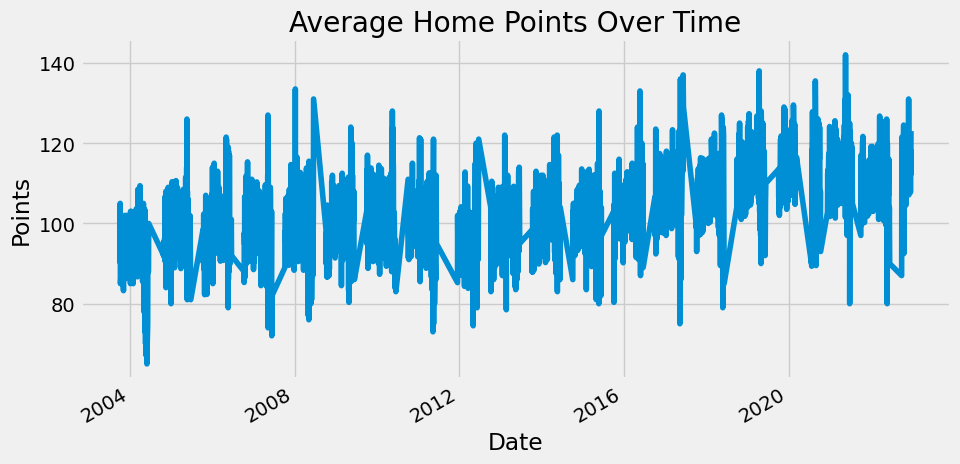

In [25]:
plt.figure(figsize=(10,5))
df_games_sub_grouped['PTS_home'].plot()
plt.title('Average Home Points Over Time')
plt.xlabel('Date')
plt.ylabel('Points')
plt.grid(True)

plt.savefig('average_home_points.png', dpi = 300)

plt.show()

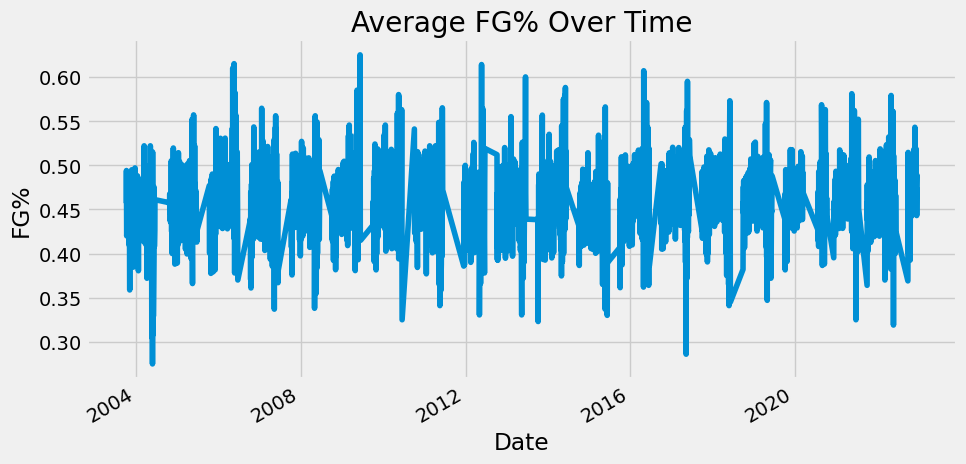

In [26]:
plt.figure(figsize=(10,5))
df_games_sub_grouped['FG_PCT_home'].plot()
plt.title('Average FG% Over Time')
plt.xlabel('Date')
plt.ylabel('FG%')
plt.grid(True)

plt.savefig('average_fg%.png', dpi = 300)

plt.show()

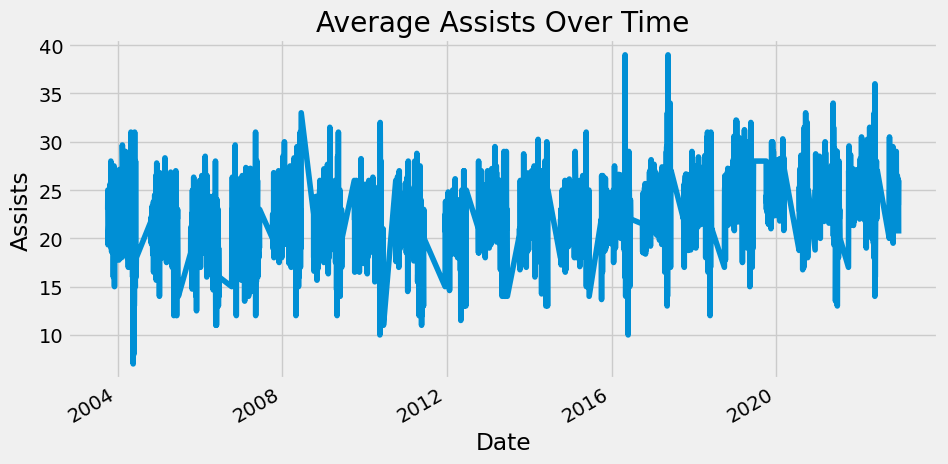

In [27]:
plt.figure(figsize=(10,5))
df_games_sub_grouped['AST_home'].plot()
plt.title('Average Assists Over Time')
plt.xlabel('Date')
plt.ylabel('Assists')
plt.grid(True)

plt.savefig('average_assists.png', dpi = 300)

plt.show()

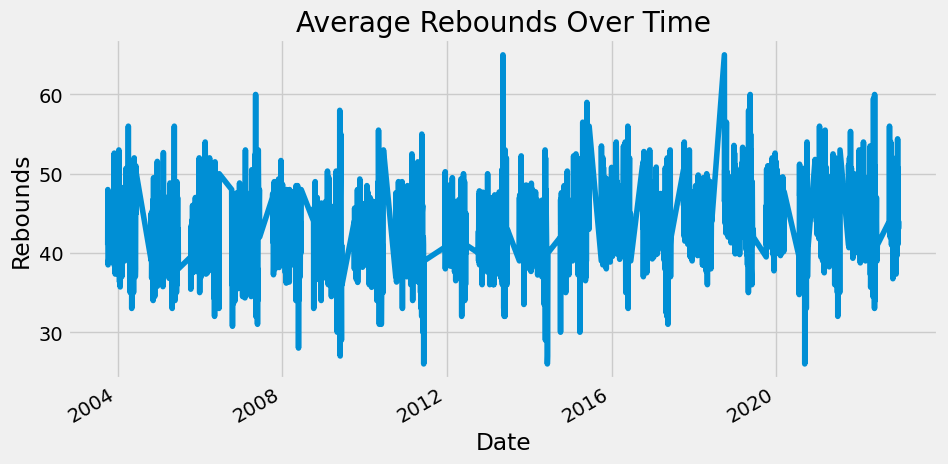

In [28]:
plt.figure(figsize=(10,5))
df_games_sub_grouped['REB_home'].plot()
plt.title('Average Rebounds Over Time')
plt.xlabel('Date')
plt.ylabel('Rebounds')
plt.grid(True)

plt.savefig('average_rebounds.png', dpi = 300)

plt.show()

# 05. Decomposition

### using the additive model to decompose the data

In [32]:
# Decomposition of Average Points data
decomposition = sm.tsa.seasonal_decompose(df_games_sub_grouped['PTS_home'], model='additive', period = 180)

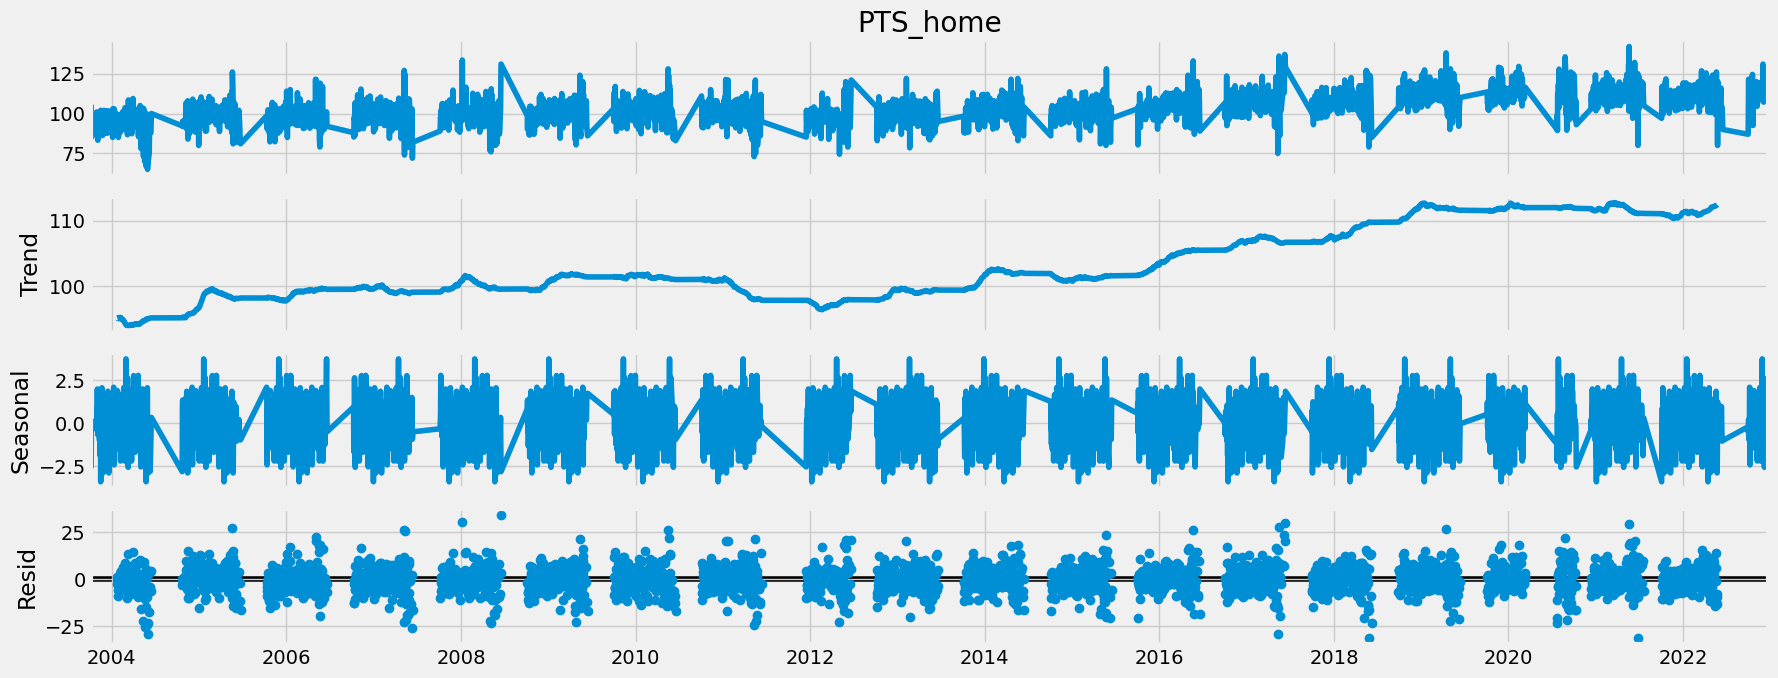

In [33]:
from pylab import rcParams

rcParams['figure.figsize'] = 18, 7

# Plot the separate components
y = decomposition.plot()
y.savefig('decomp_home_pts.png', dpi = 300)
plt.show()

#### - Points are very volatile.
#### - theres a clear upward trend. Average points from 2004-2013 was around 95-100, average points by 2022 was 110+
#### - very few spikes/unusual data - which is probably due to some unusual games that go to overtime 

# 06. Dickey-Fullet Test

In [34]:
from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(df_games_sub_grouped['PTS_home'])

Dickey-Fuller Stationarity test:
Test Statistic                   -2.860070
p-value                           0.050192
Number of Lags Used              30.000000
Number of Observations Used    4257.000000
Critical Value (1%)              -3.431887
Critical Value (5%)              -2.862219
Critical Value (10%)             -2.567132
dtype: float64


#### Test Stat = -2.860 > -2.862 > -3.422, which means we CAN'T reject the Null if we're using a 1% or 5% significance level. 
#### This means the data is not stationary at teh 5% level, but is stationary at the 10% level

# 07. Differencing

In [35]:
df_diff = df_games_sub_grouped - df_games_sub_grouped.shift(1) # The df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)

In [36]:
df_diff.dropna(inplace = True)

In [37]:
df_diff.head()

,PTS_home,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,REB_home
date,,,,,,
2003-10-06,15.000000,0.037000,-0.117000,0.124000,2.000000,7.000000
2003-10-07,-9.428571,-0.056286,0.082000,0.060714,-5.285714,-4.571429
2003-10-08,-10.571429,-0.017714,-0.028167,0.041119,-0.380952,-4.928571
2003-10-28,8.666667,0.037000,-0.037833,-0.102167,6.333333,2.500000
2003-10-29,-3.939394,-0.041000,0.079182,0.015152,-4.393939,5.272727


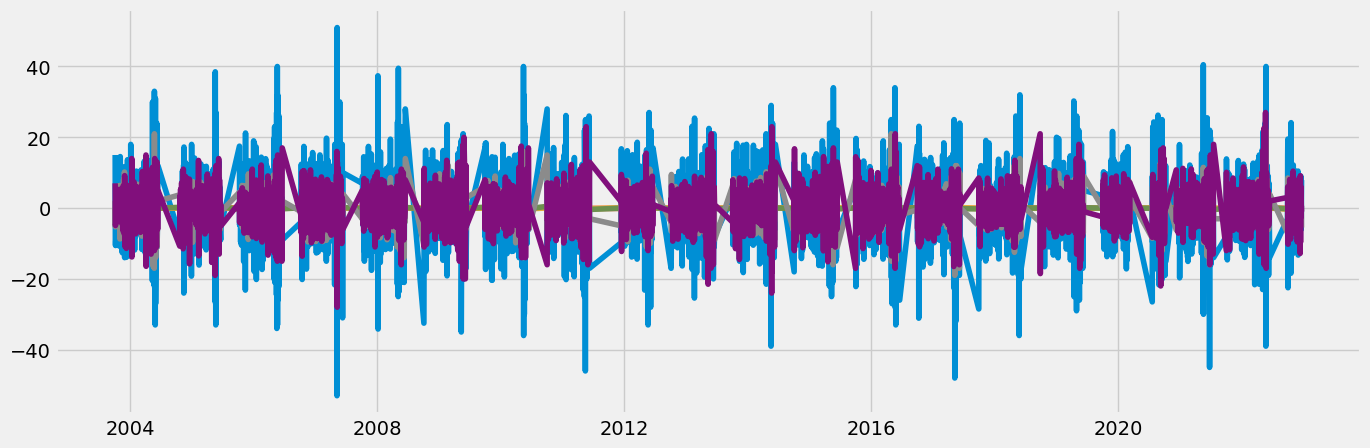

In [38]:
plt.figure(figsize=(15,5), dpi=100)
plt.plot(df_diff)

In [40]:
dickey_fuller(df_diff['PTS_home'])

Dickey-Fuller Stationarity test:
Test Statistic                -1.812956e+01
p-value                        2.508295e-30
Number of Lags Used            3.100000e+01
Number of Observations Used    4.255000e+03
Critical Value (1%)           -3.431888e+00
Critical Value (5%)           -2.862220e+00
Critical Value (10%)          -2.567132e+00
dtype: float64


#### -18 < -3.4 < -2.86 < -2.57, then we CAN REJECT the null. Data is now stationary

# 08. Autocorrelations

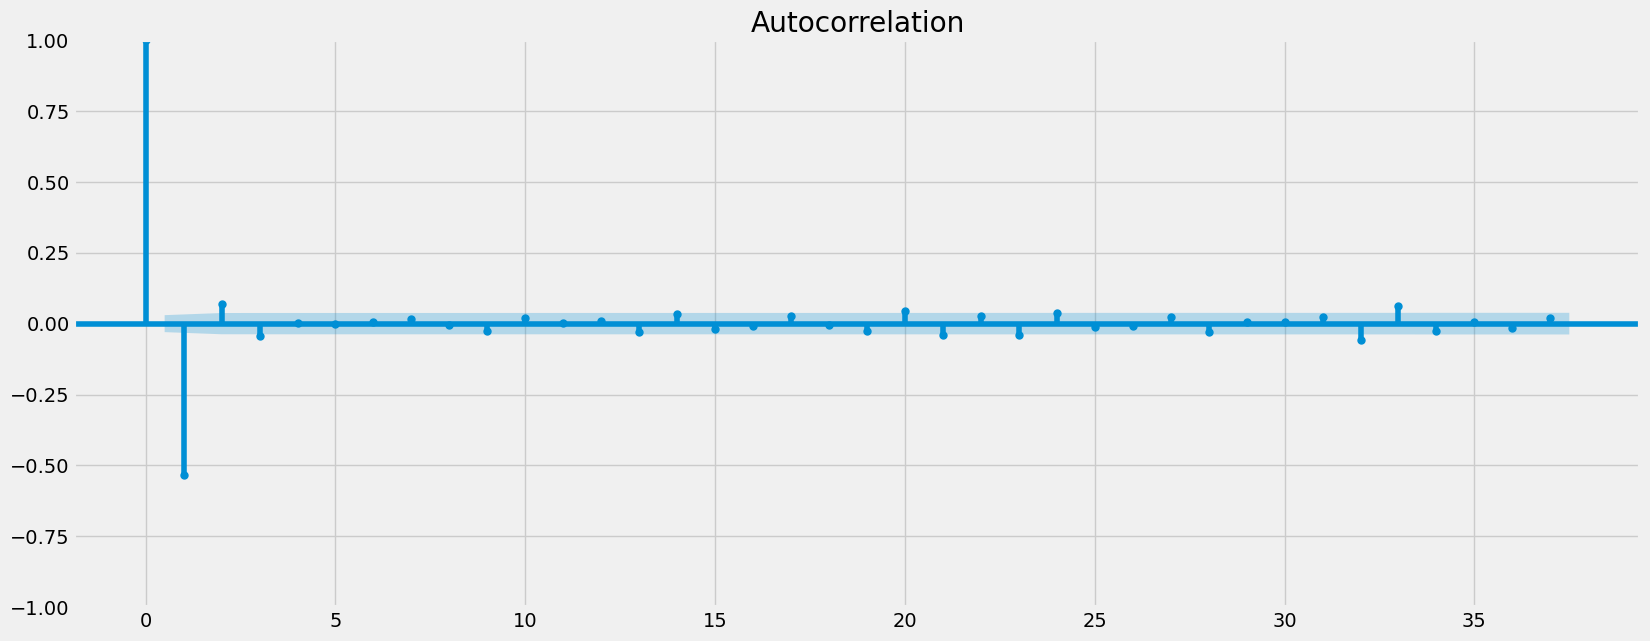

In [43]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(df_diff['PTS_home'])
plt.show()

#### - Lag 1 has a strong negative correlation
#### - most other lags are close to 0 and fall within the blue confidence bands meaning that they are not statistically significant 